In [1]:
import yfinance as yf
import pandas as pd
import data as pdr
import datetime as dt
import numpy as np 


In [2]:
# Right now I am declaring a date range for the stock returns
endDate = dt.datetime.now()

startDate = endDate - dt.timedelta(days = 365 * 6)
endDate,startDate

(datetime.datetime(2024, 10, 28, 12, 56, 15, 498214),
 datetime.datetime(2018, 10, 30, 12, 56, 15, 498214))

In [3]:
# Creating a list of top 10 Tech stocks and Tech index/ETFs

tech_stocks = ['NVDA', 'AAPL', 'MSFT', 'AMZN',
               'GOOGL', 'META', 'TSLA', 'AVGO', 'AMD', 'ORCL']

tech_funds = ['SMH', 'MAGS', 'XLK', 'QQQ', 'FDN',
              'SOXX', 'ARKK', 'BOTZ', 'OND' 'ARKW']


In [4]:
# Downloading stock data from Yahoo Finance
stocks_df = yf.download(tech_stocks, start = startDate, end = endDate)
funds_df = yf.download(tech_funds, start = startDate, end = endDate)
 

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  9 of 9 completed

1 Failed download:
['ONDARKW']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


In [5]:
stocks_df.head()

Price                      Adj Close                                   \
Ticker                          AAPL        AMD       AMZN       AVGO   
Date                                                                    
2018-10-30 00:00:00+00:00  50.811142  17.200001  76.521004  18.332527   
2018-10-31 00:00:00+00:00  52.135612  18.209999  79.900497  18.538250   
2018-11-01 00:00:00+00:00  52.936012  20.219999  83.276497  19.068289   
2018-11-02 00:00:00+00:00  49.424736  20.230000  83.276497  18.312622   
2018-11-05 00:00:00+00:00  48.021652  19.900000  81.389999  18.256222   

Price                                                                   \
Ticker                         GOOGL        META        MSFT      NVDA   
Date                                                                     
2018-10-30 00:00:00+00:00  52.345879  145.781067   97.544907  5.029466   
2018-10-31 00:00:00+00:00  54.394310  151.334335  100.441231  5.223461   
2018-11-01 00:00:00+00:00  54.164879  151.294479   99.604309  5.403828   
2018-11-02 00:00:00+00:00  53.442169  149.898682   99.830002  5.324793   
2018-11-05 00:00:00+00:00  52.656113  148.233688  101.099503  5.246750   

Price                                            ...     Volume             \
Ticker                          ORCL       TSLA  ...       AAPL        AMD   
Date                                             ...                         
2018-10-30 00:00:00+00:00  44.209095  21.993334  ...  146640000   99049400   
2018-10-31 00:00:00+00:00  44.454853  22.488001  ...  153435600  110463700   
2018-11-01 00:00:00+00:00  44.227295  22.952000  ...  233292800  136896500   
2018-11-02 00:00:00+00:00  44.445747  23.094000  ...  365314800  123788000   
2018-11-05 00:00:00+00:00  44.618694  22.760000  ...  264654800  108016700   

Price                                                                         \
Ticker                          AMZN      AVGO     GOOGL      META      MSFT   
Date                                                                           
2018-10-30 00:00:00+00:00  249202000  29697000  59768000  50528300  65350900   
2018-10-31 00:00:00+00:00  187804000  28146000  70916000  60101300  51062400   
2018-11-01 00:00:00+00:00  162710000  36830000  40132000  25640800  33384200   
2018-11-02 00:00:00+00:00  139110000  40241000  43438000  24708700  37680200   
2018-11-05 00:00:00+00:00  112494000  27609000  45358000  15971200  27922100   

Price                                                      
Ticker                          NVDA      ORCL       TSLA  
Date                                                       
2018-10-30 00:00:00+00:00  807192000  24438200  136900500  
2018-10-31 00:00:00+00:00  745772000  21082900  114364500  
2018-11-01 00:00:00+00:00  566528000  17764900  120001500  
2018-11-02 00:00:00+00:00  452960000  17289300  117120000  
2018-11-05 00:00:00+00:00  379332000  13125800  117465000  

[5 rows x 60 columns]

In [6]:
funds_df.head()

Price                      Adj Close                                      \
Ticker                          ARKK       BOTZ         FDN MAGS ONDARKW   
Date                                                                       
2018-10-30 00:00:00+00:00  38.801334  18.532995  122.040001  NaN     NaN   
2018-10-31 00:00:00+00:00  39.791927  19.074671  126.010002  NaN     NaN   
2018-11-01 00:00:00+00:00  41.791809  19.287476  128.059998  NaN     NaN   
2018-11-02 00:00:00+00:00  42.502041  19.761436  127.559998  NaN     NaN   
2018-11-05 00:00:00+00:00  41.885258  19.674383  126.290001  NaN     NaN   

Price                                                                   \
Ticker                            QQQ        SMH       SOXX        XLK   
Date                                                                     
2018-10-30 00:00:00+00:00  159.399933  43.366245  50.448612  63.675072   
2018-10-31 00:00:00+00:00  163.146729  43.854244  51.088169  65.189606   
2018-11-01 00:00:00+00:00  165.298691  45.970474  53.486454  65.951546   
2018-11-02 00:00:00+00:00  162.724030  45.238468  52.680752  64.662811   
2018-11-05 00:00:00+00:00  162.320496  44.820850  52.201088  64.596947   

Price                          Close  ...       Open  Volume                   \
Ticker                          ARKK  ...        XLK    ARKK     BOTZ     FDN   
Date                                  ...                                       
2018-10-30 00:00:00+00:00  41.520000  ...  66.879997  507400  1102900  932800   
2018-10-31 00:00:00+00:00  42.580002  ...  68.699997  327600  1515800  626500   
2018-11-01 00:00:00+00:00  44.720001  ...  69.400002  450700   550300  993400   
2018-11-02 00:00:00+00:00  45.480000  ...  69.570000  528500   756900  532800   
2018-11-05 00:00:00+00:00  44.820000  ...  68.699997  246900   638900  465200   

Price                                                                          
Ticker                    MAGS ONDARKW       QQQ       SMH     SOXX       XLK  
Date                                                                           
2018-10-30 00:00:00+00:00  NaN     NaN  92584000  23647600  2495700  30560800  
2018-10-31 00:00:00+00:00  NaN     NaN  73828600  16491400  3495900  21144100  
2018-11-01 00:00:00+00:00  NaN     NaN  52706800  23242800  3511500  15553100  
2018-11-02 00:00:00+00:00  NaN     NaN  75966800  19188800  3240000  20213100  
2018-11-05 00:00:00+00:00  NaN     NaN  39573500  12826400  2405100  14208200  

[5 rows x 54 columns]

In [7]:
#Selecting the adjusted close prices

adj_close_prices_stocks = stocks_df['Adj Close']
adj_close_prices_funds = funds_df['Adj Close']

In [8]:
# Calculating the daily returns by calculating the natural log of the daily changes in the reuturns.
# This is done so that when we analyse these returns, it becomes additive.
# The shift represents the previous day so that we can see the change.

log_returns_stocks = np.log(adj_close_prices_stocks/adj_close_prices_stocks.shift(1))
log_returns_funds = np.log(adj_close_prices_funds/adj_close_prices_funds.shift(1))


In [9]:
log_returns_funds.head()

Ticker,ARKK,BOTZ,FDN,MAGS,ONDARKW,QQQ,SMH,SOXX,XLK
Date,,,,,,,,,
2018-10-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-31 00:00:00+00:00,0.025209,0.028809,0.032012,NaN,NaN,0.023234,0.011190,0.012598,0.023507
2018-11-01 00:00:00+00:00,0.049036,0.011095,0.016138,NaN,NaN,0.013104,0.047128,0.045875,0.011620
2018-11-02 00:00:00+00:00,0.016852,0.024276,-0.003912,NaN,NaN,-0.015698,-0.016052,-0.015178,-0.019734
2018-11-05 00:00:00+00:00,-0.014618,-0.004415,-0.010006,NaN,NaN,-0.002483,-0.009274,-0.009147,-0.001019


In [10]:
# Calculating the cumlative returns

cumulative_log_returns_stocks = log_returns_stocks.cumsum()
cumulative_log_returns_funds = log_returns_funds.cumsum()

<Axes: title={'center': 'Cumlative returns on Top 10 Tech ETFs and Index Funds over the past 5 years'}, xlabel='Date'>

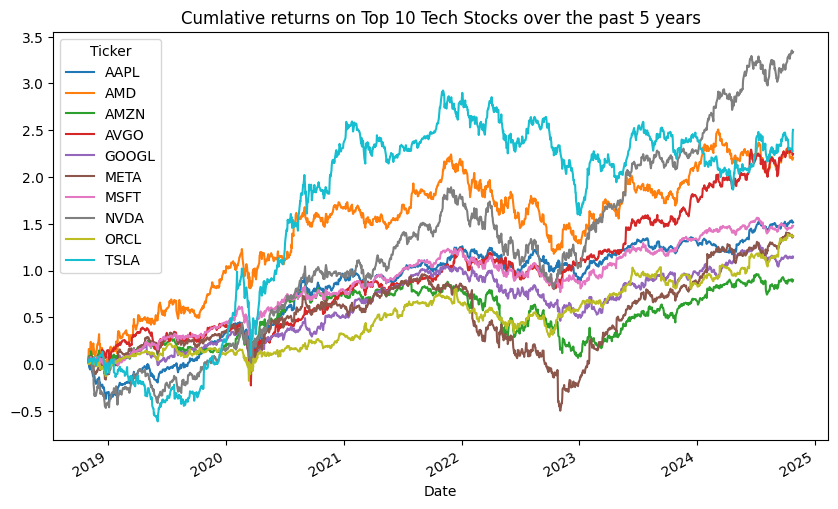

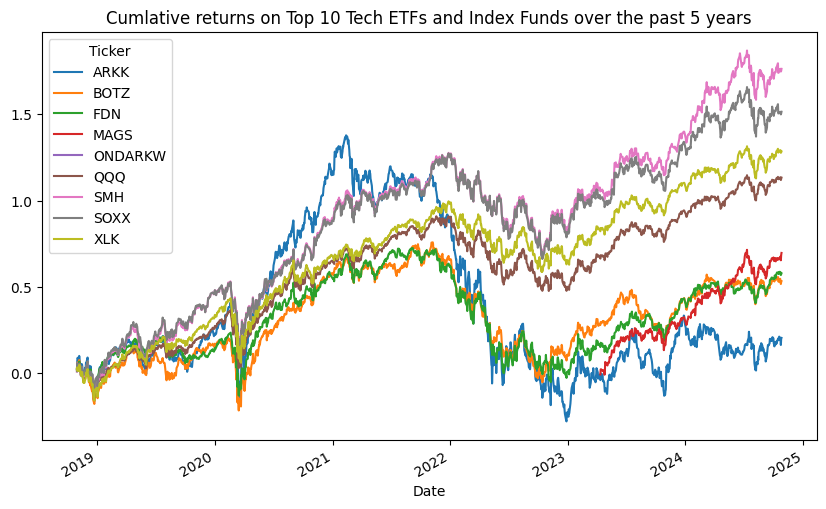

In [ ]:
# Plotting cumlative returns

cumulative_log_returns_stocks.plot(title = "Cumlative returns on Top Tech Stocks over the past 5 years", figsize = (10,6))
cumulative_log_returns_funds.plot(title = "Cumlative returns on Top Tech ETFs and Index Funds over the past 5 years", figsize = (10,6))